In [79]:
# Importing Neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Models
from sklearn.linear_model import LinearRegression,  LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.decomposition import PCA

# Metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve 
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder

## Importing the dataset

In [80]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
car_ass = pd.read_excel('/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx')

In [81]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [82]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [83]:
df.shape

(205, 26)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [85]:
# Descriptive stats
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [86]:
# Null Value Check
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

# In case Null values:

# #Finding the mean of the column having NaN
# mean_value=gfg['G2'].mean()
  
# # Replace NaNs with mean/median/mode
# gfg['G2'].fillna(value=mean_value, inplace=True)


,Total No. of Missing Values
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [87]:
# Check for duplicate values
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


## Data Cleaning

In [88]:
#Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])

df.insert(3,"CompanyName",CompanyName)
df.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [89]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [90]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [91]:
df.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## EDA

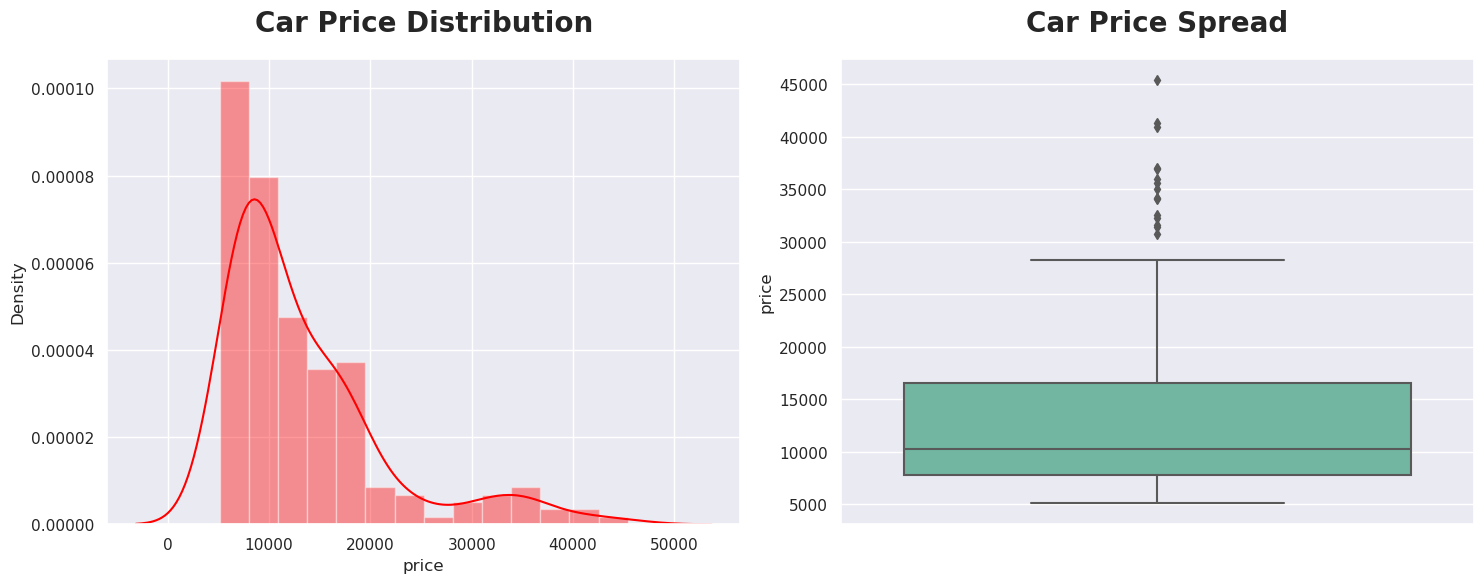

In [92]:
# Visualization of Target Features

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

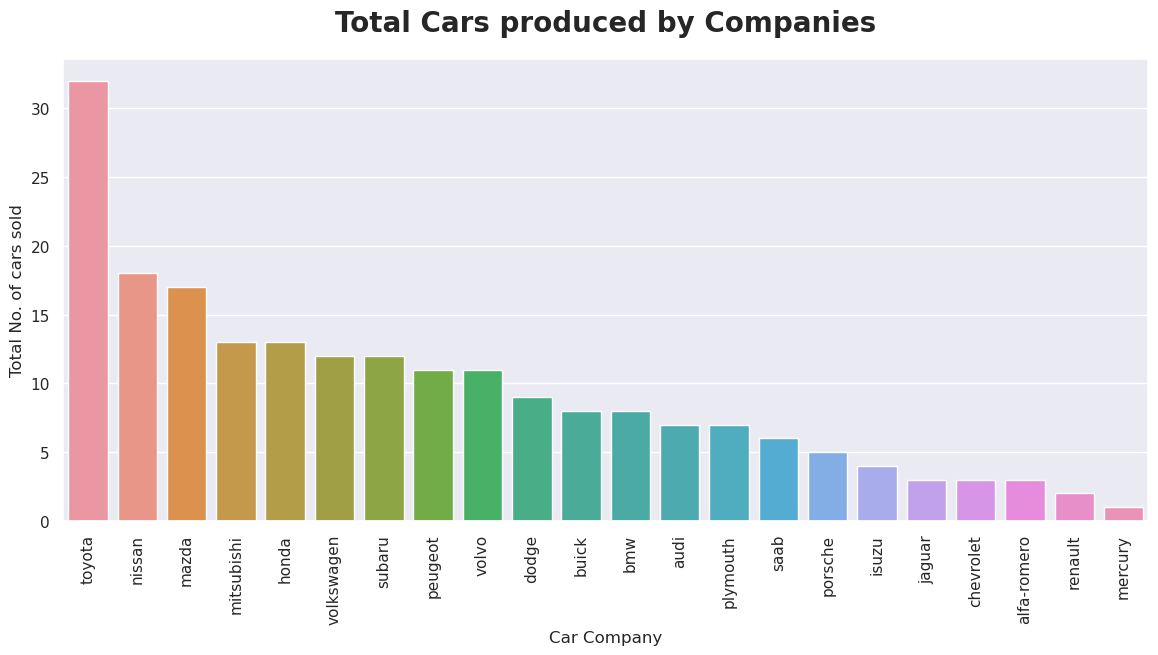

In [93]:
## Cars Sold by different companies

plt.figure(figsize=(14,6))
counts = df["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

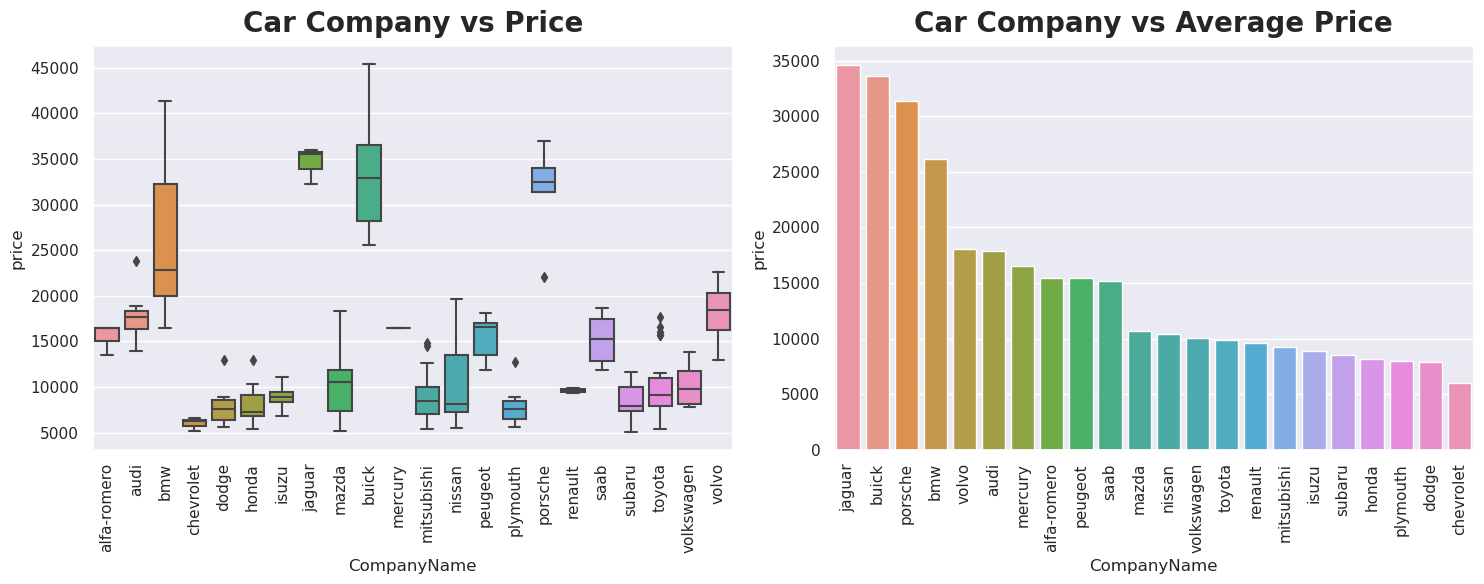

In [94]:
## Car Company vs Price
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

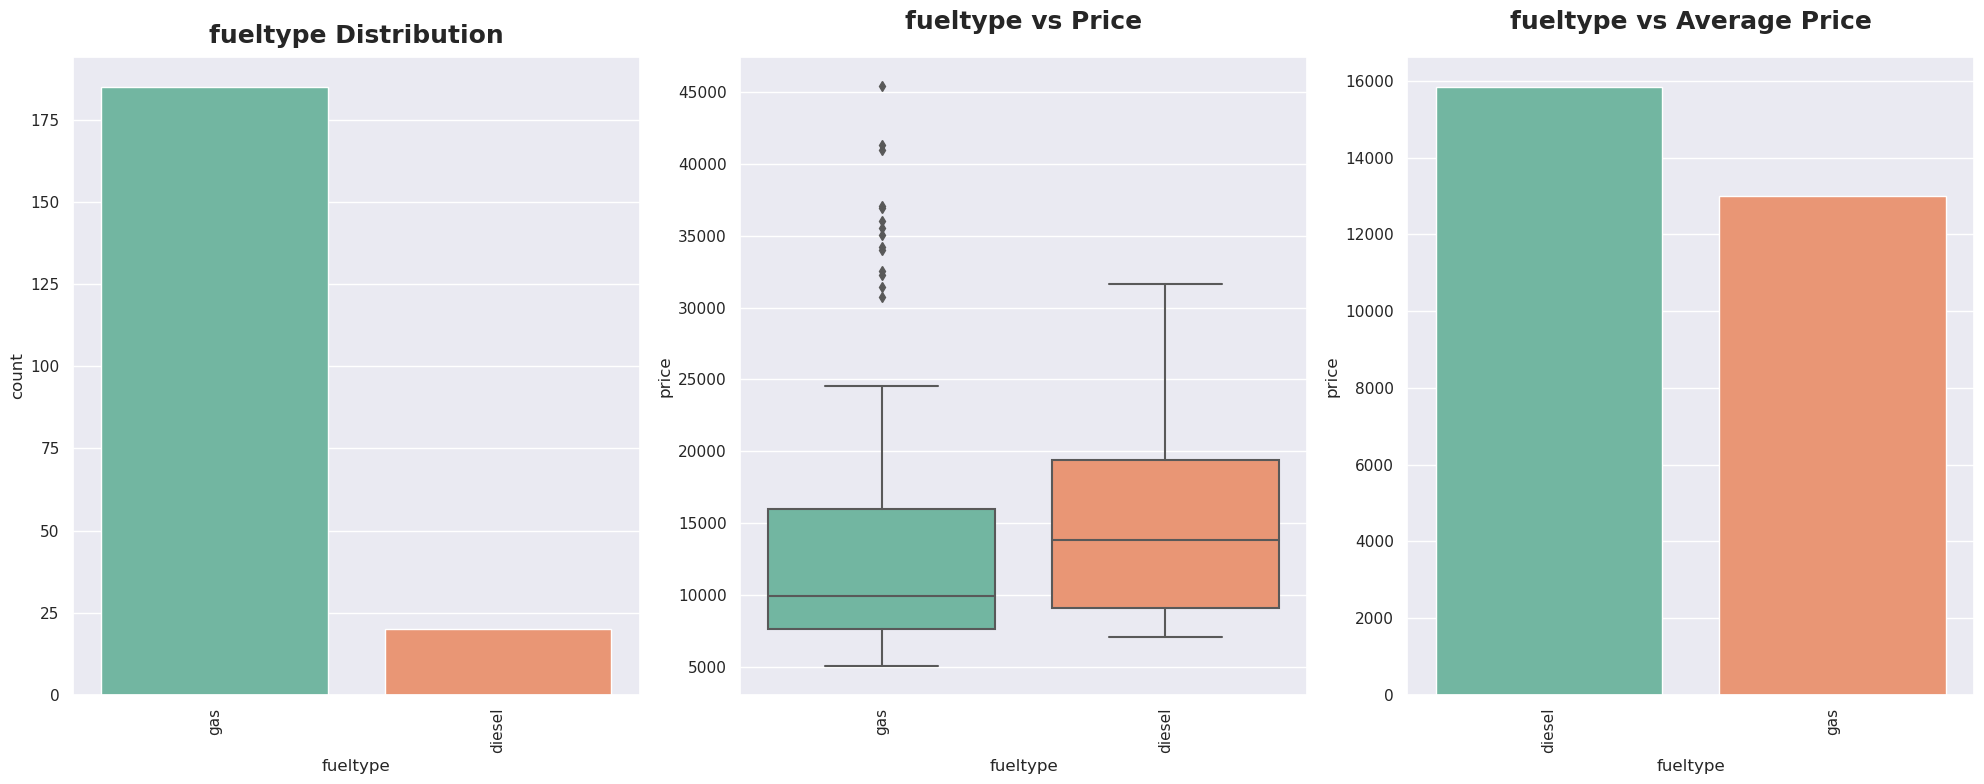

In [95]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("fueltype")

In [96]:
## Scatter Plots for Numerical Variable
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

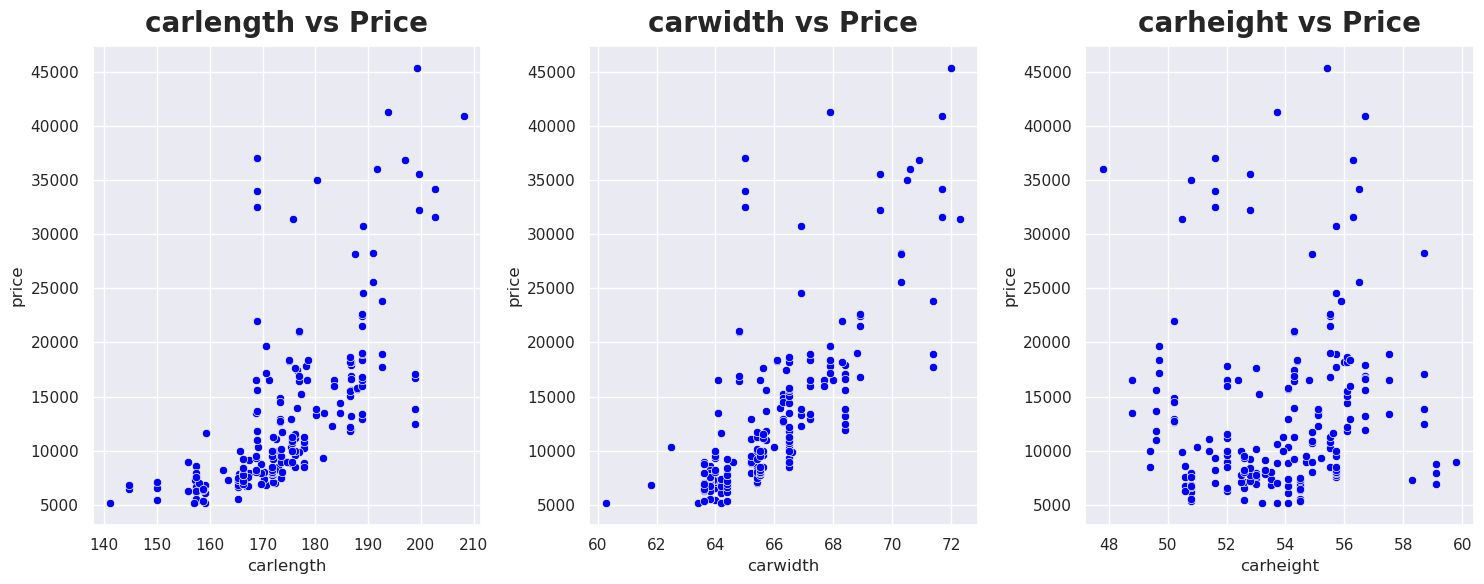

In [97]:
scatter_plot(["carlength","carwidth","carheight"])

## Featuure Engineering

In [98]:
#Binning the Car Companies based on avg prices of each Company.

df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [99]:
df['price'] = df['price'].astype('int')

temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()

temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


## Preprocessing

In [100]:
df_numeric = df.select_dtypes(include=["int","float"])
df_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [101]:
cols = df.columns.tolist()
cols

['car_ID',
 'symboling',
 'CarName',
 'CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'carsrange']

In [102]:
cols[27],cols[26] = cols[26],cols[27] 
df = df[cols]


In [103]:
df.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carsrange,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,Medium,13495
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,Medium,16500
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,Medium,16500
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,Medium,13950
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,Medium,17450


In [104]:
X = df.drop(columns=['price'])
Y = df.iloc[:,-1]

## MinMax Scaler on Numeric

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    object  
 3   CompanyName       205 non-null    object  
 4   fueltype          205 non-null    object  
 5   aspiration        205 non-null    object  
 6   doornumber        205 non-null    object  
 7   carbody           205 non-null    object  
 8   drivewheel        205 non-null    object  
 9   enginelocation    205 non-null    object  
 10  wheelbase         205 non-null    float64 
 11  carlength         205 non-null    float64 
 12  carwidth          205 non-null    float64 
 13  carheight         205 non-null    float64 
 14  curbweight        205 non-null    int64   
 15  enginetype        205 non-null    object  
 16  cylindernumber    205 non-

In [106]:
X_numeric = X.select_dtypes(include = ['int','float'])
X_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [107]:
X_cat = X.select_dtypes(include = ['object','category'])
X_cat.head()

,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carsrange
0,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,audi 100 ls,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,audi 100ls,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,Medium


In [108]:
names = X_numeric.columns
indexes = X_numeric.index
sc = MinMaxScaler((0, 1))
x_num = sc.fit_transform(X_numeric)
x_num = pd.DataFrame(x_num, columns=names, index=indexes)
x_num.head()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.000000,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
1,0.004902,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
2,0.009804,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158
3,0.014706,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421
4,0.019608,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895


## Label Encoder on Categorical

In [109]:
cat_col = X_cat.columns
x_cat = pd.DataFrame()
le = LabelEncoder()
for col in cat_col:
    x_cat[col]= le.fit_transform(X_cat[col])

x_cat.head()

,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carsrange
0,2,0,1,0,1,0,2,0,0,2,5,2
1,3,0,1,0,1,0,2,0,0,2,5,2
2,1,0,1,0,1,2,2,0,5,3,5,2
3,4,1,1,0,0,3,1,0,3,2,5,2
4,5,1,1,0,0,3,0,0,3,1,5,2


In [110]:
x = x_num.merge(x_cat, left_index = True, right_index = True)
x.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carsrange
0,0.000000,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,1,0,1,0,2,0,0,2,5,2
1,0.004902,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,1,0,1,0,2,0,0,2,5,2
2,0.009804,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,1,0,1,2,2,0,5,3,5,2
3,0.014706,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,1,0,0,3,1,0,3,2,5,2
4,0.019608,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,1,0,0,3,0,0,3,1,5,2


## Random Forest Regressor

In [111]:
reg=RandomForestRegressor()
reg.fit(x,Y)

RandomForestRegressor()

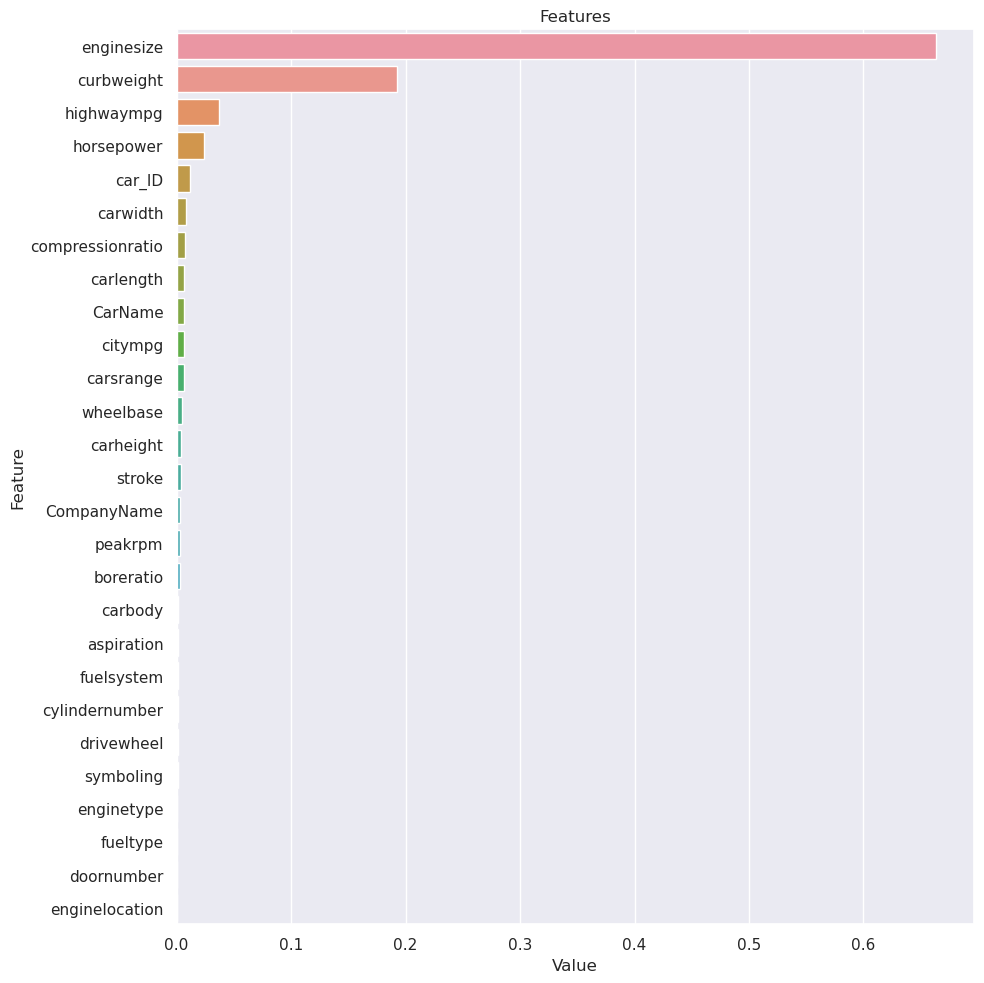

In [112]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(reg, x)

# Select K Best

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression, f_regression, chi2, f_classif, mutual_info_classif # or another statistical test

# X is the feature matrix, y is the target vector
X_new=SelectKBest(score_func=f_regression,k=15).fit_transform(x,Y)

In [114]:
X_new

array([[0.05830904, 0.41343284, 0.31666667, ..., 0.        , 5.        ,
        2.        ],
       [0.05830904, 0.41343284, 0.31666667, ..., 0.        , 5.        ,
        2.        ],
       [0.2303207 , 0.44925373, 0.43333333, ..., 0.        , 5.        ,
        2.        ],
       ...,
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.        , 5.        ,
        2.        ],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.        , 3.        ,
        2.        ],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.        , 5.        ,
        2.        ]])

## Lasso Regressor

In [115]:
regressor = LassoCV()
regressor.fit(x,Y)

LassoCV()

In [116]:
print("Best alpha using built-in LassoCV: %f" % regressor.alpha_)
print("Best score using built-in LassoCV: %f" %regressor.score(x,Y))
coef = pd.Series(regressor.coef_, index = x.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 75.463133
Best score using built-in LassoCV: 0.874141
Lasso picked 16 variables and eliminated the other 11 variables


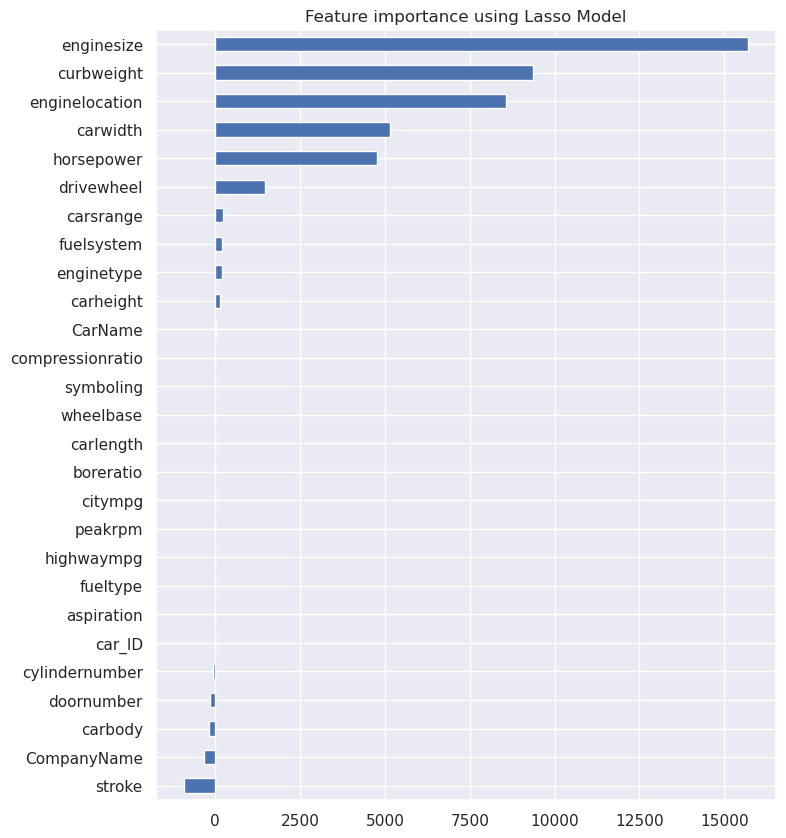

In [117]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

## Train Test Splitwa

In [118]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=1 - train_ratio, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))


In [119]:
print("X Train:",X_train.shape)
print("X Validation:",X_val.shape)
print("X Test:",X_test.shape)


X Train: (153, 15)
X Validation: (31, 15)
X Test: (21, 15)


In [120]:
# Helper functions

training_score = []
validation_score = []
testing_score = []
accuracy_score = []
precision_score = []
recall_score = []
f1_score1 = []
models = []
    
def get_predictions(clf, X_train, X_val, X_test, y_train, y_val,y_test,reg=False,cat=False):
    # create classifier
    clf = clf
    
    models.append(clf)
    
    # fit it to training data
    clf.fit(X_train,y_train)
    
    # predict using test data
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    y_pred_test = clf.predict(X_test)
    
    if reg == True:
        a = r2_score(y_train,y_pred_train)*100
        b = r2_score(y_val,y_pred_val)*100
        c = r2_score(y_test,y_pred_test)*100
        training_score.append(a)
        validation_score.append(b)
        testing_score.append(c)
    
        print(f"r2_Score of {clf} model on Training Data is:",a)
        print(f"r2_Score of {clf} model on Validation Data is:",b)
        print(f"r2_Score of {clf} model on Testing Data is:",c)
    
    if cat == True:
        target_names= ['cat1', 'cat2']
        
        # Compute predicted probabilities: y_pred_prob
        y_pred_train_prob = clf.predict_proba(X_train)
        y_pred_val_prob = clf.predict_proba(X_val)
        y_pred_test_prob = clf.predict_proba(X_test)
        
        acc = accuracy_score(y_test,y_pred_test)
        rec = recall_score(y_test,y_pred_test)
        prec = precision_score(y_test,y_pred_test)
        f1 = f1_score(y_test,y_pred_test)
        
        print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_test)) 
        print("recall score: ", rec)
        print("precision score: ", prec)
        print("f1 score: ", )
        print("accuracy score: ", acc )
        print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_test_prob[:,1])))
        print(classification_report(y_test, y_pred_test, target_names=target_names))
        
        accuracy_score.append(acc)
        precision_score.append(prec)
        recall_score.append(rec)
        f1_score1.append(f1)
        


# Model Building

## Linear Regression

In [121]:
lr = LinearRegression()
get_predictions(lr, X_train, X_val, X_test, y_train, y_val,y_test,reg=True)

r2_Score of LinearRegression() model on Training Data is: 89.46480717619626
r2_Score of LinearRegression() model on Validation Data is: 84.63976040052094
r2_Score of LinearRegression() model on Testing Data is: 84.39353870539327


## Decision Tree Regressor

In [122]:
dtr = DecisionTreeRegressor()
get_predictions(dtr, X_train, X_val, X_test, y_train, y_val,y_test,reg=True)

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.99870990234983
r2_Score of DecisionTreeRegressor() model on Validation Data is: 63.63000035060629
r2_Score of DecisionTreeRegressor() model on Testing Data is: 95.29792266733487


## Random Forest Regressor

In [123]:
rf = RandomForestRegressor()
get_predictions(rf, X_train, X_val, X_test, y_train, y_val,y_test,reg=True)

r2_Score of RandomForestRegressor() model on Training Data is: 98.75542119801044
r2_Score of RandomForestRegressor() model on Validation Data is: 88.76965042719858
r2_Score of RandomForestRegressor() model on Testing Data is: 97.14730655731798


## Ada Boost Regressor

In [124]:
ada = AdaBoostRegressor()
get_predictions(ada, X_train, X_val, X_test, y_train, y_val,y_test,reg=True)

r2_Score of AdaBoostRegressor() model on Training Data is: 96.12454663847635
r2_Score of AdaBoostRegressor() model on Validation Data is: 78.87092056501824
r2_Score of AdaBoostRegressor() model on Testing Data is: 94.39833974816153


## Gradient Boost Regressor

In [125]:
gbr = GradientBoostingRegressor()
get_predictions(gbr, X_train, X_val, X_test, y_train, y_val,y_test,reg=True)

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.46359260238962
r2_Score of GradientBoostingRegressor() model on Validation Data is: 77.26852086486544
r2_Score of GradientBoostingRegressor() model on Testing Data is: 97.45506792666957


## XGB Regressor

In [126]:
xgb = XGBRegressor()
get_predictions(xgb, X_train, X_val, X_test, y_train, y_val,y_test,reg=True)

r2_Score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) model on Training Data is: 99.99862840454466
r2_Score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0

In [127]:
cat = CatBoostRegressor(verbose = False)
get_predictions(cat, X_train, X_val, X_test, y_train, y_val,y_test,reg=True)

r2_Score of <catboost.core.CatBoostRegressor object at 0x72121f1b3890> model on Training Data is: 99.74829713673896
r2_Score of <catboost.core.CatBoostRegressor object at 0x72121f1b3890> model on Validation Data is: 91.02123340476861
r2_Score of <catboost.core.CatBoostRegressor object at 0x72121f1b3890> model on Testing Data is: 94.19897390659098


# Model Comparision

In [128]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","XGBoost","CatBoost"]

In [129]:
comp = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                    "Validation Score":validation_score,
                   "Testing Score":testing_score})

comp

,Algorithms,Training Score,Validation Score,Testing Score
0,Linear Regression,89.464807,84.639760,84.393539
1,Decision Tree,99.998710,63.630000,95.297923
2,Random Forest,98.755421,88.769650,97.147307
3,Ada Boost,96.124547,78.870921,94.398340
4,Gradient Boost,99.463593,77.268521,97.455068
5,XGBoost,99.998628,73.375373,96.462865
6,CatBoost,99.748297,91.021233,94.198974


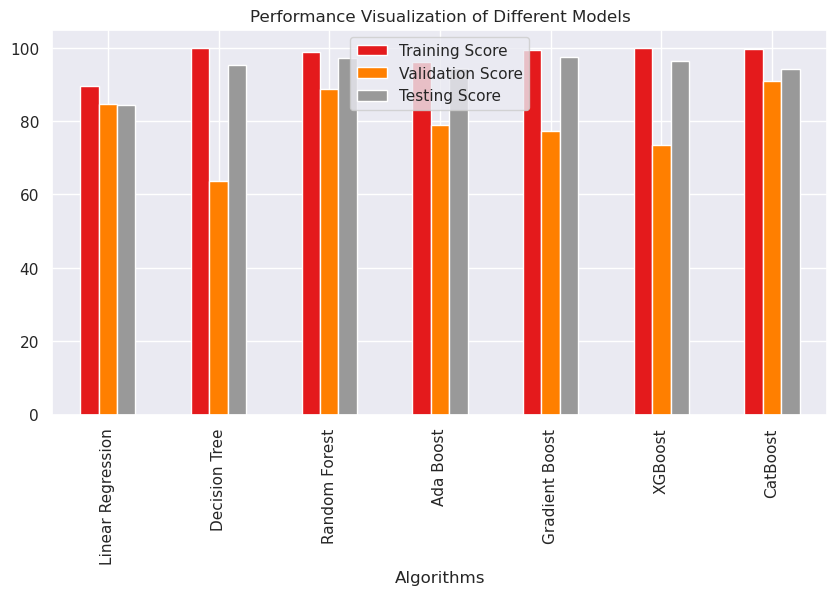

In [130]:
comp.plot(x="Algorithms",y=["Training Score","Validation Score","Testing Score"], figsize=(10,5),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()